In [2]:
import pandas as pd 
import numpy as np
import torch

data = pd.read_csv(f"datasets/AutoAM_dataset.csv")
data = data.groupby(data.columns[-1]).mean().reset_index()

# find how many outliers are in the dataset
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))].count().sum()
print(f"Number of outliers: {outliers}")
data.describe()



Number of outliers: 19


,Score,Prime Delay,Print Speed,X Offset Correction,Y Offset Correction
count,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.604262,1.510027,3.421874,-0.287250,-0.477385
std,0.222322,2.012377,2.878927,0.216260,0.479088
min,0.000000,0.000000,0.100000,-0.837284,-1.000000
25%,0.506045,0.000000,1.568030,-0.391117,-1.000000
50%,0.649364,0.000000,3.177502,-0.310328,-0.416497
75%,0.741053,3.485758,4.545758,-0.223820,-0.106964
max,0.936549,5.000000,10.000000,1.000000,1.000000


In [12]:
def set_seeds(seed):
    np.random.seed(seed)

set_seeds(22)
total_samples = 100
noise = 0.01
# Step 1: Define the mixture of Cauchy distributions
def mixture_cauchy_function(x, x0s=[0], gammas=[1], weights=[1]):
    assert len(x0s) == len(gammas) == len(weights), "Length of parameters must match"
    mixture = np.zeros_like(x)
    for x0, gamma, weight in zip(x0s, gammas, weights):
        mixture += weight * (1 / (np.pi * gamma * (1 + ((x - x0) / gamma) ** 2)))
    return mixture / np.sum(weights)

# Step 2: Sample 200 points from the function
np.random.seed(0)  # For reproducibility
X = np.linspace(-10, 10, total_samples)
x0s = [0, 0, 0]  # Location parameters
gammas = [1, 3, 5]  # Scale parameters for heavier tails
weights = [1, 1, 1]  # Equal weights for simplicity
Y = mixture_cauchy_function(X, x0s, gammas, weights)

# Step 3: Add noise to the sampled points
cauchy_noise = np.random.standard_cauchy(Y.shape) * noise
Yc = Y + cauchy_noise
Yc = Yc/Yc.max()
X = X/X.max()

# Slightly noisy data
Yc[40:45] += 0

data = pd.DataFrame({"X": X, "Y": Yc})
data.describe()

# find how many outliers are in the dataset
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))].count().sum()
print(f"Number of outliers: {outliers}")

Number of outliers: 10


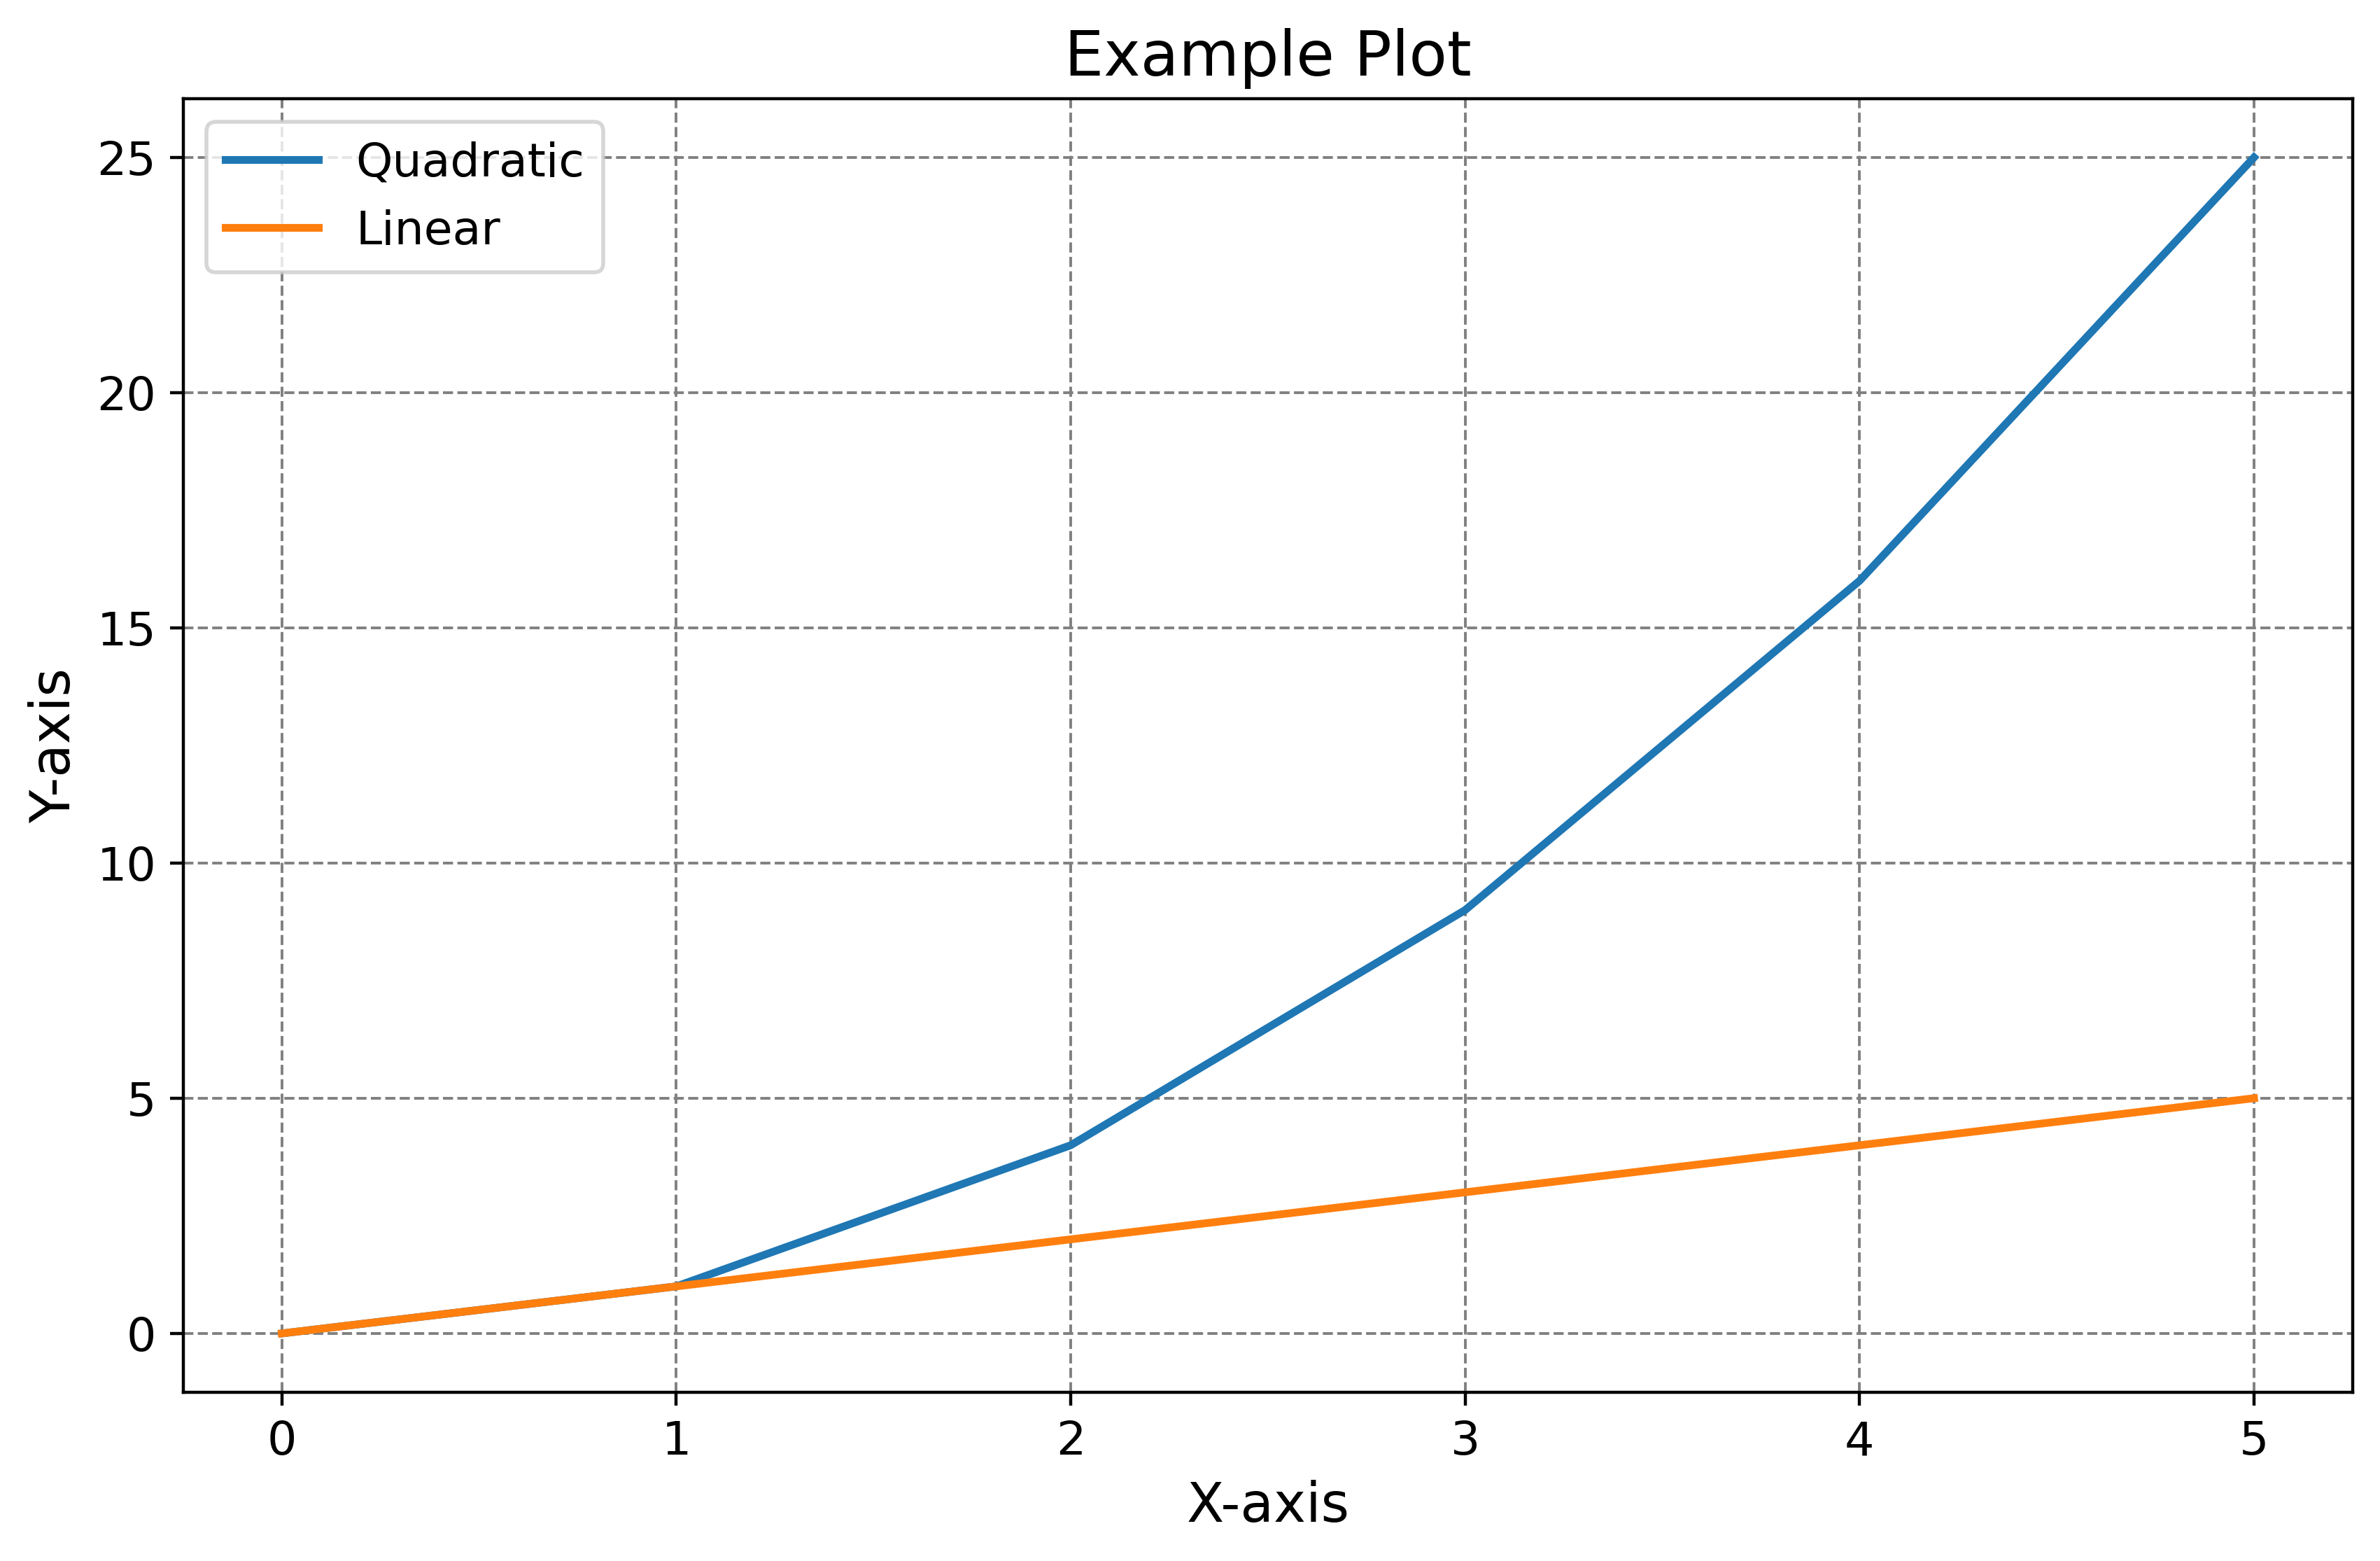

In [5]:
import matplotlib.pyplot as plt

# General settings
plt.rcParams['font.size'] = 14  # Increase font size for readability
plt.rcParams['axes.titlesize'] = 16  # Title font size
plt.rcParams['axes.labelsize'] = 14  # Axis label font size
plt.rcParams['xtick.labelsize'] = 12  # X-axis tick label font size
plt.rcParams['ytick.labelsize'] = 12  # Y-axis tick label font size
plt.rcParams['legend.fontsize'] = 12  # Legend font size
plt.rcParams['figure.figsize'] = [10, 6]  # Default figure size
plt.rcParams['lines.linewidth'] = 2  # Line width
plt.rcParams['axes.grid'] = True  # Show grid
# set the dpi to be 400
plt.rcParams['figure.dpi'] = 400

# Color palette
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

# Grid settings
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.7

# Legend settings
plt.rcParams['legend.loc'] = 'best'  # Place the legend in the best location

# Example of applying these settings to a plot
x = [0, 1, 2, 3, 4, 5]
y1 = [0, 1, 4, 9, 16, 25]
y2 = [0, 1, 2, 3, 4, 5]

plt.plot(x, y1, label='Quadratic')
plt.plot(x, y2, label='Linear')
plt.title('Example Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()